In [87]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from python_speech_features import mfcc
from matplotlib.figure import Figure
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import librosa.display
from PIL import Image
import pandas as pd
import numpy as np
%matplotlib inline
import librosa
import glob

In [88]:
def txt2vec(inp):
    count = 0
    file = "../../../Downloads/glove.840B.300d.txt"
    with open(file) as fname:
        while(count<500):
            count+=1
            line = fname.readline().strip('\n').split(" ")
            word = line.pop(0)
            line = np.array(line)
            line = line.astype(np.float)
            if(inp==word):
                return line
        return np.zeros(300)

In [89]:
def describe(his):
    clips = pd.DataFrame(his, columns=["length"])
    clips.length = clips.length.astype(float)
    print(clips.length.describe())
    print(clips.length.quantile(0.92))

In [249]:
corpus = np.zeros((1,43,300))

IndexError: index 1 is out of bounds for axis 0 with size 1

In [254]:
def txt_func(fname):
    max_length = 43
    corpus = np.zeros((1,43,300))
    lines = fname.readlines()
    par = [line.replace("'","").strip('\n').split(" ") for line in lines]
    for elem in par: elem.pop(0)
    row = [[i.lower() for i in j] for j in par]
    
    for j in par:
        if(len(j)>43):
            return corpus
        
        for i in range(len(j)):
            hold = txt2vec(j[i])
            hold = np.array(hold)
            corpus[0,i,:] = hold

    return corpus

In [255]:
def aud_func(y,sr):
        max_seconds = 15
        max_length = max_seconds*sr
        img_arr = np.zeros(max_length)
        padd = lambda x: y[x] if(x<y.shape[0]) else 0
        for i in range(len(img_arr)):
            img_arr[i]=padd(i)
            
        D = np.abs(librosa.stft(img_arr))
        S = librosa.feature.melspectrogram(S=D,fmax=3000)
        S = librosa.feature.melspectrogram(y=img_arr,sr=sr,n_mels=40,fmax=3000)

        fig = librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='linear')
        plt.axis('off')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        plt.savefig('test.png',bbox_inches='tight',pad_inches=0)
        
        image = mpimg.imread('test.png')
        return image

In [256]:
#max_length = 43
#file = sorted(glob.glob('dev-clean/LibriSpeech/dev-clean/*/*/'))
file = "dev-clean/LibriSpeech/dev-clean/84/121123/"

dev-clean/LibriSpeech/dev-clean/84/121123/84-121123.trans.txt
dev-clean/LibriSpeech/dev-clean/84/121123/84-121123-0000.flac
dev-clean/LibriSpeech/dev-clean/84/121123/84-121123-0001.flac
dev-clean/LibriSpeech/dev-clean/84/121123/84-121123-0002.flac
dev-clean/LibriSpeech/dev-clean/84/121123/84-121123-0003.flac
dev-clean/LibriSpeech/dev-clean/84/121123/84-121123-0004.flac
dev-clean/LibriSpeech/dev-clean/84/121123/84-121123-0005.flac
dev-clean/LibriSpeech/dev-clean/84/121123/84-121123-0006.flac
dev-clean/LibriSpeech/dev-clean/84/121123/84-121123-0007.flac
dev-clean/LibriSpeech/dev-clean/84/121123/84-121123-0008.flac
dev-clean/LibriSpeech/dev-clean/84/121123/84-121123-0009.flac
dev-clean/LibriSpeech/dev-clean/84/121123/84-121123-0010.flac
dev-clean/LibriSpeech/dev-clean/84/121123/84-121123-0011.flac
dev-clean/LibriSpeech/dev-clean/84/121123/84-121123-0012.flac
dev-clean/LibriSpeech/dev-clean/84/121123/84-121123-0013.flac
dev-clean/LibriSpeech/dev-clean/84/121123/84-121123-0014.flac
dev-clea

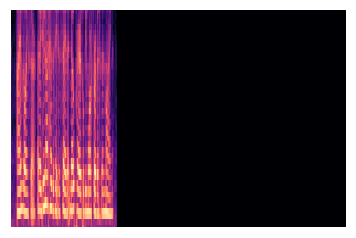

In [263]:
txt_files = sorted(glob.glob(file+"*.txt"))
aud_files = sorted(glob.glob(file+"*.flac"))
tup_data = []

txt_list = np.zeros((100,43,300))
#aud_list = np.zeros((1,43,300))
#txt_list = []
aud_list = []

txt_count = 0
for txt in txt_files:
    print(txt)
    fname = open(txt)
    sentence = txt_func(fname)
    txt_list[txt_count,:,:] = sentence
    fname.close()
    txt_count+=1
for aud in aud_files:
    print(aud)
    y, sr = librosa.load(aud)
    img = aud_func(y,sr)
    aud_list.append(img)    

In [266]:
aud_list = np.array(aud_list)
txt_list = np.array(txt_list)
print(aud_list.shape)
print(txt_list.shape)

(29, 224, 341, 4)
(100, 43, 300)


In [268]:
zipped = []
for i in range(aud_list.shape[0]):
    tup = (aud_list[i],txt_list[i])
    zipped.append(tup)

In [269]:
txt_list = np.array(txt_list)
aud_list = np.array(aud_list)
zipped = np.array(zipped)

In [271]:
print(txt_list.shape)
print(aud_list.shape)
print(zipped.shape)
print(zipped[0][0].shape)
print(zipped[0][1].shape)

(100, 43, 300)
(29, 224, 341, 4)
(29, 2)
(224, 341, 4)
(43, 300)


In [274]:
np.save('data',zipped)